# Import Packages

In [1]:
import xgi
import hypercontagion as hc
import matplotlib.pyplot as plt
import time
import numpy as np
import cProfile
import random

# Set Up the Hypergraph
* Specify the number of nodes
* Specify the hyperdegree distribution
* Generates a configuration model of the hypergraph

In [2]:
n = 1000
k1 = {i : random.randint(5, 10) for i in range(n)}
k2 = {i : sorted(k1.values())[i] for i in range(n)}

H = xgi.chung_lu_hypergraph(k1, k2)

# Epidemic Simulations

## Epidemic Parameters
* Initial size is the number of initial infected nodes
* $\gamma$ is the healing rate of a node
* $\mathbf{\beta}$ is the infection rate for each hyperedge size (keys are the hyperedge size and the value is the infection rate)

In [3]:
initial_size = 100
gamma = 0.01
tau = {i: 0.1 for i in xgi.unique_edge_sizes(H)}

## Run an SIR simulation on hypergraphs
* First simulation is is with discrete time steps (DTMC)
* Second simulation is the Gillespie algorithm (CTMC)

In [6]:
t1, S1, I1, R1 = hc.discrete_SIR(H, tau, gamma, tmin=0, tmax=100, dt=1, initial_infecteds = range(initial_size))
# t, S2, I2, R2 = Gillespie_SIR(H, tau, gamma, tmin=0, tmax = 10, initial_infecteds = range(initial_size))
#cProfile.run('discrete_SIR(H, tau, gamma, tmin=0, tmax=100, dt=0.1, rho=0.5)', sort="cumtime")
#t, S2, I2, R2 = Gillespie_SIR(H, tau, gamma, tmin=0, tmax = 100, initial_infecteds = range(initial_size))

### Plot the results

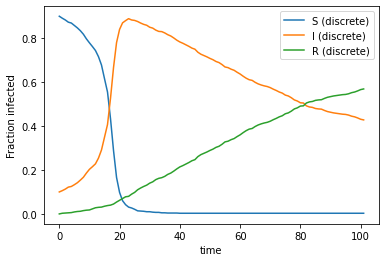

In [7]:
plt.figure()
plt.plot(t1, S1/n, label="S (discrete)")
plt.plot(t1, I1/n, label="I (discrete)")
plt.plot(t1, R1/n, label="R (discrete)")
# plt.plot(t, S2/n, label="S (continuous)")
# plt.plot(t, I2/n, label="I (continuous)")
# plt.plot(t, R2/n, label="R (continuous)")
plt.legend()
plt.xlabel('time')
plt.ylabel('Fraction infected')
plt.show()

## Run an SIS simulation on hypergraphs
* First simulation is is with discrete time steps (DTMC)
* Second simulation is the Gillespie algorithm (CTMC)

In [4]:
t1, S1, I1 = hc.discrete_SIS(H, tau, gamma, tmin=0, tmax=10, dt=1, initial_infecteds = range(initial_size))
t, S2, I2 = Gillespie_SIS(H, tau, gamma, tmin=0, tmax = 10, initial_infecteds = range(initial_size))

AttributeError: 'Hypergraph' object has no attribute 'getHyperedgeSizes'

### Plot the results

In [ ]:
plt.figure()
plt.plot(t1, S1/n, label="S (discrete)")
plt.plot(t1, I1/n, label="I (discrete)")
plt.plot(t, S2/n, label="S (continuous)")
plt.plot(t, I2/n, label="I (continuous)")
plt.legend()
plt.xlabel('time')
plt.ylabel('Fraction infected')
plt.show()


# Opinion Models
* Discrete state, random update (Voter model)
* Discrete state, deterministic update (Majority rule)
* Continuous state, random update (Deffuant-Weisbuch model)
* Continuous state, deterministic update (Hegelmann-Krause)

### Import Opinion Model Library

In [ ]:
import hypercontagion.simulation.opinions as opinions
import random

## Voter Model
* Binary opinion: For/Against or Yes/No
* Randomly choose a hyperedge and if a majority of neighbors believe the opposite, then you change your mind 

### Run simulation

In [ ]:
yesAndNo = [random.choice(["Yes", "No"]) for i in range(n)]
yesAndNo = np.array(yesAndNo, dtype=object)
t, statesVM = opinions.random_node_and_group_sim_discrete_state(H, yesAndNo, tmin=0, tmax=10000)

### Plot Results

In [ ]:
yesArray = np.count_nonzero(statesVM == "Yes", axis=0)
noArray = np.count_nonzero(statesVM == "No", axis=0)
plt.figure()
plt.plot(t, yesArray, label="For")
plt.plot(t, noArray, label="Against")
plt.xlabel("Time")
plt.ylabel("Number of people for idea")
plt.legend()
plt.show()

## Deffuant-Weisbuch

$\epsilon$ is a "cautiousness" parameter

In [ ]:
epsilon=0.3

### Run Simulation

In [ ]:
initial_states = np.random.uniform(low=-1.0, high=1.0, size=n)
t, statesDW = opinions.random_group_sim_continuous_state_1D(H, initial_states, tmin = 0, tmax=10000, epsilon=epsilon)

### Plot Results

In [ ]:
plt.figure()
plt.plot(t, statesDW[::10,:].T)
plt.xlabel("Time")
plt.ylabel("Opinion on the spectrum [-1,1]")
plt.show()

## Hegselmann-Krause

### Run Simulation

In [ ]:
initial_states = np.random.uniform(low=-1.0, high=1.0, size=n)
t, statesHK = opinions.synchronous_update_continuous_state_1D(H, initial_states, tmin=0, tmax=10)

### Plot Results

In [ ]:
plt.figure()
plt.plot(t, statesHK[::50,:].T)
plt.xlabel("Time")
plt.ylabel("Opinion on the spectrum [-1,1]")
plt.show()